<a href="https://colab.research.google.com/github/rajeshmore1/unsupervised-topic-modelling-of-unlabeled-text-descriptions/blob/main/Task3_Text_based_clustering(NLP)_Rajesh_More_Xeeva_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Text based clustering (NLP) : Perform unsupervised topic modelling of unlabeled text descriptions

A.Perform preprocessing and cleaning  text data 

B.Execute feature engineering method to extract text features (use TF-IDF or BOW or any other appropriate method)

C.Run topic modelling clustering algorithm to label text descriptions with proper category


In [ ]:
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE



%matplotlib inline

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Xeeva/Assignment-2/Data/DocumentsData.xlsx")
df = df.rename(columns={'Doc Name': 'DocName'})

In [ ]:
df.head()

,Id,DocName
0,1,"Nozzle, 220542"
1,2,Value Collection 15 Inch Long x 12 Inch Wide x...
2,3,Made in USA 18 Inch Long x 13 Inch Wide x 4 mi...
3,4,"8""W x 10""L 4mil Clear Reclosable Bag"
4,5,Value Collection 12 Inch Long x 9 Inch Wide x ...


In [ ]:
import nltk
STOPWORDS = nltk.corpus.stopwords.words('english')

In [ ]:
STOPWORDS = set(STOPWORDS)
#STOPWORDS = STOPWORDS.words('english')

    
def text_prepare(text, STOPWORDS):
    """
        text: a string
        
        return: a clean string
    """
    REPLACE_BY_SPACE_RE = re.compile('[\n\"\'/(){}\[\]\|@,;#]')
    text = re.sub(REPLACE_BY_SPACE_RE, ' ', text)
    text = re.sub(' +', ' ', text)
    text = text.lower()

    # delete stopwords from text
    text = ' '.join([word for word in text.split() if word not in STOPWORDS]) 
    text = text.strip()
    return text

In [ ]:
import re # for regular expressions

df['docname'] = df['DocName'].apply(lambda x: text_prepare(x,STOPWORDS))

In [ ]:
newdf = df.docname

In [ ]:
newdf.head(3)

0                                        nozzle 220542
1    value collection 15 inch long x 12 inch wide x...
2    made usa 18 inch long x 13 inch wide x 4 mil t...
Name: docname, dtype: object

In [ ]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

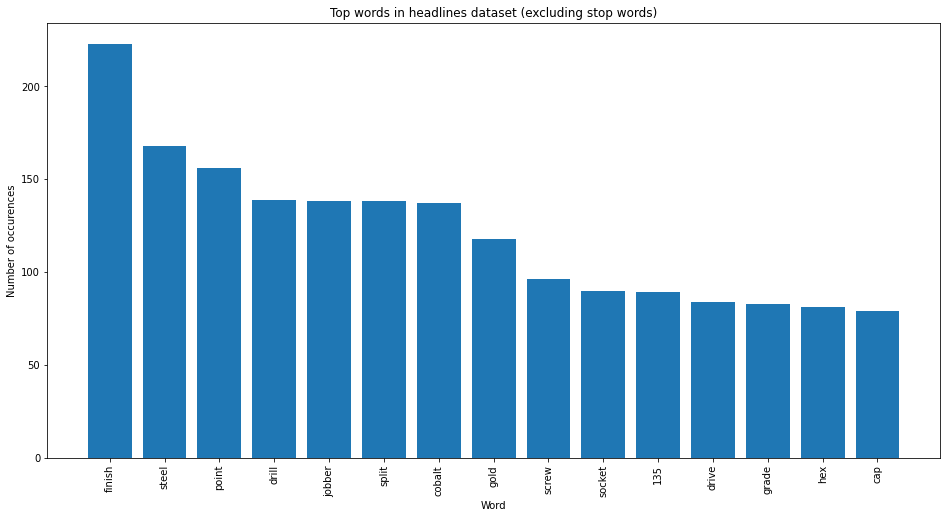

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=newdf)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in headlines dataset (excluding stop words)')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

In [ ]:
# Creating a vectorizer
vectorizer = CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
data_vectorized = vectorizer.fit_transform(df["DocName"])

In [ ]:
NUM_TOPICS = 10


In [ ]:
# Latent Dirichlet Allocation Model
lda = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online',verbose=True)
data_lda = lda.fit_transform(data_vectorized)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


In [ ]:
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD

In [ ]:
# Non-Negative Matrix Factorization Model
nmf = NMF(n_components=NUM_TOPICS)
data_nmf = nmf.fit_transform(data_vectorized) 

In [ ]:
# Latent Semantic Indexing Model using Truncated SVD
lsi = TruncatedSVD(n_components=NUM_TOPICS)
data_lsi = lsi.fit_transform(data_vectorized)

In [ ]:
# Functions for printing keywords for each topic
def selected_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]]) 

In [ ]:
# Keywords for topics clustered by Latent Dirichlet Allocation
print("LDA Model:")
selected_topics(lda, vectorizer)

LDA Model:
Topic 0:
[('grade', 23.13542330148543), ('oxide', 22.668536063070334), ('aluminum', 22.638119173803375), ('grit', 19.628506548442445), ('max', 19.071718624370426), ('disc', 18.408563362479534), ('diam', 17.09572943859911), ('rpm', 16.821016520752526), ('fine', 15.429547086535578), ('type', 15.019039210722084)]
Topic 1:
[('steel', 107.56562087208734), ('screw', 81.67695978204522), ('socket', 80.40887835307512), ('drive', 79.46449190266397), ('head', 74.44472653594036), ('hex', 74.14438376401758), ('cap', 67.6463849867675), ('grade', 52.07548439042587), ('stainless', 52.05812112459026), ('alloy', 47.26632348669209)]
Topic 2:
[('blade', 18.838227006429793), ('min', 6.146474686176225), ('reciprocating', 5.688900014239201), ('knife', 5.643672993236588), ('saw', 5.618285230144067), ('steel', 5.057771670380151), ('qty', 4.7217699436623795), ('oal', 4.593167703449413), ('carbon', 3.0373678716014414), ('handle', 2.415883959054751)]
Topic 3:
[('cut', 19.15468939947463), ('diam', 15.59

In [ ]:
# Keywords for topics clustered by Latent Semantic Indexing
print("NMF Model:")
selected_topics(nmf, vectorizer)

NMF Model:
Topic 0:
[('gold', 2.2228913020024397), ('finish', 2.2146564334503274), ('point', 2.2128648604486334), ('drill', 2.2070826185744097), ('jobber', 2.2048382655694034), ('split', 2.2019761076408577), ('cobalt', 2.2007529884304775), ('ltr', 0.5174440472761002), ('type', 0.013782918630070926), ('metal', 0.010343640632260847)]
Topic 1:
[('screw', 1.6382259229881362), ('hex', 1.5625713605602312), ('cap', 1.5322697944718435), ('finish', 1.4968922727920817), ('black', 1.4837367787998943), ('steel', 1.4322281679204805), ('alloy', 1.4046197655136892), ('oxide', 1.3987116803900614), ('socket', 1.3143618416630807), ('astm', 1.221695748519425)]
Topic 2:
[('steel', 2.1730456979676505), ('stainless', 2.1549182021452937), ('screw', 2.1417725959347895), ('grade', 2.132628366891222), ('head', 1.894338664153532), ('phillips', 1.6630167874090447), ('drive', 1.6092654519635987), ('pan', 1.5091811141757236), ('sheet', 0.9308140043687027), ('metal', 0.9267628858219119)]
Topic 3:
[('inch', 2.9844860

In [ ]:
# Keywords for topics clustered by Non-Negative Matrix Factorization
print("LSI Model:")
selected_topics(lsi, vectorizer)

LSI Model:
Topic 0:
[('finish', 0.4325144615474514), ('point', 0.3673533871628748), ('drill', 0.35410136198352066), ('jobber', 0.3537349757604793), ('split', 0.35347575423555894), ('cobalt', 0.35284953435102984), ('gold', 0.2983549293260931), ('steel', 0.12357137668306092), ('oxide', 0.09574240444909507), ('socket', 0.08100214212209411)]
Topic 1:
[('steel', 0.40736294703746906), ('socket', 0.3592666937010019), ('drive', 0.2849545048268317), ('cap', 0.27492986630581184), ('hex', 0.2734772372649621), ('screw', 0.26583868974232416), ('head', 0.24994232430000735), ('alloy', 0.2382753500906134), ('button', 0.15223336483149638), ('grade', 0.1482661212512114)]
Topic 2:
[('grade', 0.3422068002597156), ('inch', 0.288122979351055), ('type', 0.23632492482507345), ('stainless', 0.21611252578908036), ('steel', 0.2066472749750689), ('screw', 0.1654547719279349), ('phillips', 0.1589774098653331), ('diam', 0.15208217980234637), ('pan', 0.14321830677274325), ('length', 0.11479852211673436)]
Topic 3:
[(

In [ ]:
pip install pyldavis

     |████████████████████████████████| 1.7MB 8.1MB/s 
  Created wheel for pyldavis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135593 sha256=eec7013868d1371464f5bcc0b170facfe18f01ceefb1c4ec03fc587e8ec55d05
  Stored in directory: /root/.cache/pip/wheels/74/df/b6/97234c8446a43be05c9a8687ee0db1f1b5ade5f27729187eae
Successfully built pyldavis


In [ ]:
import pyLDAvis.sklearn


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [ ]:
pyLDAvis.enable_notebook()
dash = pyLDAvis.sklearn.prepare(lda, data_vectorized, vectorizer, mds='tsne')
dash

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
1      32.420952   8.115230       1        1  27.771304
4       0.648955  71.707100       2        1  25.734906
6      71.019684   9.971006       3        1  10.505566
0       3.785981  33.185135       4        1   8.419740
3     -42.666500  -9.222070       5        1   7.773989
7      -3.621689 -43.526516       6        1   6.718565
5      -3.632402  -4.171708       7        1   5.357171
9     -36.584400  35.804413       8        1   3.102140
2      44.391380  50.615383       9        1   2.816079
8      40.235809 -31.591665      10        1   1.800540, topic_info=       Term        Freq       Total Category  logprob  loglift
102   point  144.000000  144.000000  Default  30.0000  30.0000
39    drill  128.000000  128.000000  Default  29.0000  29.0000
29   cobalt  127.000000  127.000000  Default  28.0000  28.0000
68   jobber  127.000000  127.000000  Default  27.0000  27.0000
135   steel  163.000000  163.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
146     usa    0.160796   26.192963  Topic10  -6.0648  -1.0760
151  washer    0.160226   26.083447  Topic10  -6.0684  -1.0754
18      cap    0.163809   70.650328  Topic10  -6.0462  -2.0497
62      hex    0.163372   74.477596  Topic10  -6.0489  -2.1051
40    drive    0.161203   78.856044  Topic10  -6.0623  -2.1756

[426 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
0         1  0.755210         abhs
1         1  0.842999        alloy
1         3  0.149867        alloy
2         4  0.894618     aluminum
2         9  0.040664     aluminum
...     ...       ...          ...
157       1  0.239288         zinc
157       3  0.717863         zinc
157       7  0.023929         zinc
158       1  0.148294  zinc-plated
158       3  0.741469  zinc-plated

[296 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 7, 1, 4, 8, 6, 10, 3, 9])